## Dimensionality Reduction, Principal Component Analysis

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

### Data Loading

In [13]:
inpData = pd.read_csv('seeds.csv')

### PCA from scratch via SVD

"The following function normalizes the data"

In [14]:
def dataNormalize(data):
    data_mean = np.mean(data, axis = 0)
    data_std = np.std(data, axis = 0) 
    data_std[data_std == 0] = 1
    data_norm = (data - data_mean)/data_std
    return data_norm

"The following step will separate the data and labels, then the data will be passed to the normalization function for processing"

In [15]:
inpData = inpData.values
data = inpData[:, 0:inpData.shape[1] - 1]
labels = inpData[:,-1]
data = dataNormalize(data)

"By utilizing numpy's SVD (A=UΣVᵀ) function, we have obtained all necessary matrices"

In [16]:
svd = np.linalg.svd
Uu, Σ, Vt = svd(data, full_matrices=False)
svdComponents = (-1)*Vt[0:2]
var_explained = np.round(Σ**2/np.sum(Σ**2), decimals=8)
X_transformed = np.dot(Uu, np.diag(Σ))
exp_var = np.var(X_transformed, axis=0)

"We will now proceed to compare the results with sklearn's PCA, so the data is passed to the PCA function"

In [17]:
pca=PCA(n_components=2) #n_components is set to first two principal components
pca.fit(data)
sklPCA_variance = pca.explained_variance_
sklPCA_ratio = pca.explained_variance_ratio_

Printing results of both

In [18]:
print("Explained Variance")
print("PCA via SVD", exp_var[:2])
print("   sklearn PCA", sklPCA_variance)
print("Explained Variance Ratio")
print("PCA via SVD", var_explained[:2])
print("   sklearn PCA", sklPCA_ratio)

Explained Variance
PCA via SVD [5.03150613 1.19913412]
   sklearn PCA [5.05691778 1.20519035]
Explained Variance Ratio
PCA via SVD [0.71878659 0.17130487]
   sklearn PCA [0.71878659 0.17130487]


Scatterplot

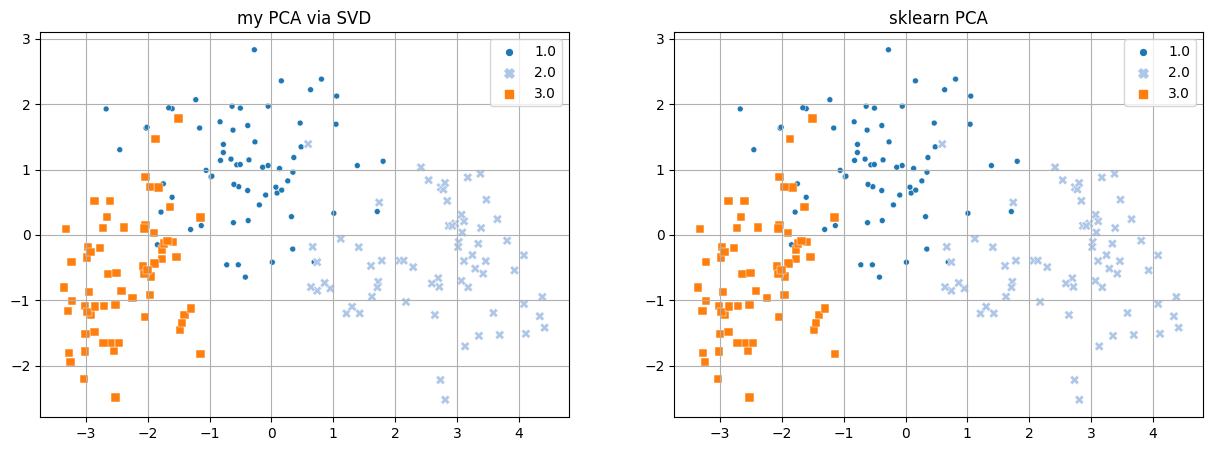

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

#transformation of original data
transformed_myPCA = np.dot(svdComponents, data.T)
transformed_sklPCA = np.dot(pca.components_,data.T)

sns.scatterplot(x=transformed_myPCA[0], y=transformed_myPCA[1], hue=labels, style=labels, size=labels, palette="tab20", ax=ax[0])
ax[0].set_title("my PCA via SVD")
ax[0].grid()

sns.scatterplot(x=transformed_sklPCA[0], y=transformed_sklPCA[1], hue=labels, style=labels, size=labels, palette="tab20", ax=ax[1])
ax[1].set_title("sklearn PCA")
ax[1].grid()

plt.show()